In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read error values from excel file

In [5]:
# path = 'D:/Box_Sync_Chalmers/Box Sync/MSc_Thesis - Kinematics team/py/errors_and_plots'                          # path of error metrics excel file
# df = pd.DataFrame(pd.read_excel('{}/sim_track_err_7Knodes_PCA.xlsx'.format(path),header=[0], index_col=[0,1]))


df = pd.DataFrame(pd.read_excel('sim_track_err_7Knodes_PCA.xlsx',header=[0], index_col=[0,1]))   

### Initializations

In [7]:
errors= ['MAE', 'Euclidean distance']
errplt= ['MAE', 'EUCD']
n_sims = np.array([25,50,75,100])
n_sims_test = np.array([25,50,75,100])
models = ['rfr','gpflow', 'FFNN']
mods= ['Random Forest','Gaussian','FFNN']

colors = ['b', 'g', 'r', 'y']
shades = ['lightblue','lightpink','lightgreen']

### Extract individual errors and plot the mean errors of test samples w.r.t sample size

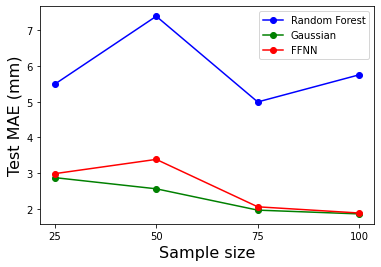

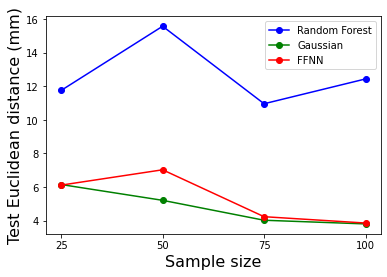

In [12]:
for j in range(len(errors)):
#     j=1
    plt.figure()
    for k in range(len(models)): 
        plt.xlabel('Sample size', fontsize = 16)
        plt.ylabel('Test {} (mm)'.format(errors[j]), fontsize = 16)
        mod = df.loc[models[k]]
        a = (mod.loc[:,errors[j]]).tolist()
        errs= []
        for i in range(0,4):
            b = np.array(a[i].split(","))
            b = b.reshape(1,len(b)).astype(float)
            errs.append(b)
        listofmeans = np.array([np.mean(i) for i in errs])
        listofstd = np.array([np.std(i) for i in errs])
        plt.plot(n_sims_test,listofmeans,'o-', color = colors[k], label = mods[k])
        # plt.fill_between(n_sims_test, listofmeans-listofstd, listofmeans+listofstd, color= shades[k], alpha =0.5)
        plt.xticks(n_sims_test)
#         plt.ylim(1,25)
        plt.legend(loc='best')
    plt.savefig('D:/Thesis/HBM_kinematics/CODE/pictures/New_folder/PCA_1k_{}.png'.format(errplt[j]))

#### plot of no. of PCs considered and reconstruction error of training set data

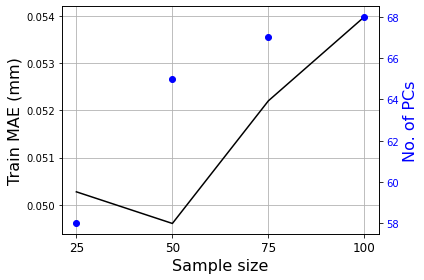

In [10]:
### For 1k nodes

# pca_err = (0.050276257,0.049605682, 0.052205037, 0.053986289)        # reconstruction error gathered from main PCA with ML files
# pcs_n = [58, 65, 67, 68]                                             # No. of PCs used for PCA, gathered from main PCA with ML files


### For 7441 nodes

pca_err_7k = (0.052354675, 0.050323889, 0.052199952, 0.051754735)      # reconstruction error gathered from main PCA with ML files
pcs_n_7k = [83, 98, 105, 110]                                          # No. of PCs used for PCA, gathered from main PCA with ML files
samps = [25,50,75,100]                                                 # Sample sizes

#### plot of no. of PCs considered and reconstruction error of training set data

fig, ax1 = plt.subplots()
ax1.grid
color = 'black'
ax1.set_xlabel('Sample size', fontsize = 16)
ax1.set_ylabel('Train {} (mm)'.format('MAE'), color=color, fontsize = 16)
ax1.plot(samps, pca_err, color=color)
ax1.tick_params(axis='y', labelcolor=color)
# ax1.set_ylim([0.05,0.055])
ax1.set_xticks(samps) 
ax1.set_xticklabels(samps, fontsize=12)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'blue'
ax2.set_ylabel('No. of PCs', color=color, fontsize = 16)  # we already handled the x-label with ax1
ax2.plot(samps, pcs_n,  'bo')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid()
# plt.savefig('D:/Thesis/HBM_kinematics/CODE/pictures/New_folder/pca_decode_err_n_pcs_1k.png')
# ax2.grid()
plt.show()

#### Plot for determining reconstruction error based on number of PCs
 For sample size of 50

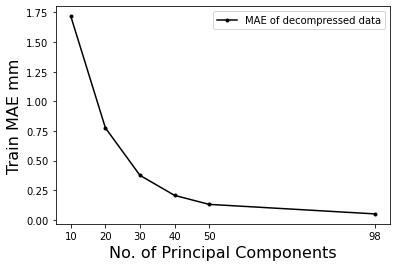

In [11]:

## MAE:1.7175520658493042 , n_comps: 10
## MAE:0.7761819958686829 , n_comps: 20
## MAE:0.37572863698005676 , n_comps: 30
## MAE:0.2066309005022049 , n_comps: 40
## MAE:0.13090093433856964 , n_comps: 50
## MAE:0.050323888659477234 , n_comps: 98

err_7k_pcs = [1.7175520658493042, 0.7761819958686829, 
              0.37572863698005676, 0.2066309005022049, 
              0.13090093433856964, 0.050323888659477234]                       # Values gathered from PCA with ML mail file
N_PCs = [10, 20, 30, 40, 50, 98]                                               # No. of PCs considered 

plt.plot(N_PCs, err_7k_pcs, 'k.-', label = 'MAE of decompressed data')
plt.xticks(N_PCs)
plt.xlabel('No. of Principal Components', fontsize = 16)
plt.ylabel('Train MAE mm', fontsize = 16)
plt.legend(loc='best')
# plt.savefig('D:/Thesis/HBM_kinematics/CODE/pictures/New_folder/MAE_Vs_nPCs.png')

